In [70]:
import pandas as pd
import glob

import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML

In [71]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((300, 300), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im = im.convert("RGB")
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [3]:
! pip install -e ../..

Obtaining file:///home/didi/Documents/fake-image-detection
  Found existing installation: src 0.0.1
    Uninstalling src-0.0.1:
      Successfully uninstalled src-0.0.1
  Running setup.py develop for src
You are using pip version 19.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from src.data.snopes.data_cleaner import DataCleaner

In [5]:
cleaner = DataCleaner()

In [105]:
RAW_DIR = '../../data/processed/reuters'
crawls = glob.glob('{}/media_*.csv'.format(RAW_DIR))
last_crawl = sorted(crawls)[-1]
df = pd.read_csv(last_crawl)

In [119]:
RAW_DIR = '../../data/processed/snopes'
crawls = glob.glob('{}/media_*.csv'.format(RAW_DIR))
last_crawl = sorted(crawls)[-1]
df = pd.read_csv(last_crawl)

In [120]:
last_crawl

'../../data/processed/snopes/media_2019-02-02 15:59:21.csv'

In [121]:
df.shape

(1283, 15)

In [122]:
df = df[df.label!='mixture']
df = df[~df.claim.str.contains('video',regex=False, case=False)]

In [106]:
df.columns

Index(['claim', 'descriptions', 'img', 'label', 'legal_page_urls', 'page_urls',
       'url_caption', 'known_urls', 'true_perc', 'false_perc', 'mixed_perc',
       'invalid_count', 'known_count', 'total_count'],
      dtype='object')

In [140]:
df['img_path'] = df.url_caption.apply(lambda x: '../../data/images/snopes/{}'.format(x))
df['image'] = df.img_path.map(lambda f: get_thumbnail(f))

In [141]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
df.shape

(838, 14)

In [14]:
df.label.value_counts()

False    641
True     197
Name: label, dtype: int64

In [15]:
df.to_csv(last_crawl, index=False)

In [16]:
df_false = df[df.label == 'false']
df_true = df[df.label == 'true']

In [87]:
df.columns

Index(['claim', 'descriptions', 'img', 'label', 'legal_page_urls', 'page_urls',
       'text_on_image', 'url_caption'],
      dtype='object')

In [43]:
sel_cols = ['claim', 'label', 'url_caption', 'img_main', 'img_all_count', 'is_video', 'url', 'title', 'author', 'date_published', 'date_updated']

In [125]:
df['known_perc'] = (df.known_count/(df.total_count-df.invalid_count+1))

In [126]:
sel_cols = ['true_perc', 'false_perc', 'mixed_perc', 'known_perc']

In [79]:
ilocs = [9, 10, 11, 12, 20, 110]

In [37]:
def latex_with_lines(df):
    res = df.to_latex(na_rep='-')
    return res.replace('\\\\\n', '\\\\ \\midrule\n')

In [ ]:
df[df.url_caption=='']

In [154]:
df.loc[1008].known_count

7

In [ ]:
https://www.denverpost.com/2008/06/04/matamoros-mexico-bike-race-fatality/

In [153]:
df.loc[1008].known_urls

"['http://www.nbcnews.com/id/24943229/ns/world_news-americas/t/dead-car-plows-mexican-bike-race/', '21/Run-them-over-or-shoot-them', '1260187', 'https://www.denverpost.com/2008/06/04/matamoros-mexico-bike-race-fatality/', 'http://www.unz.com/isteve/cars-are-white-males-bikes-are-billionaires-pedestrians-are-nobodies/', 'https://www.nydailynews.com/news/world/driver-plows-bike-race-1-killed-article-1.292133', 'https://gizmodo.com/brooks-puredrift-review-shoes-for-minimalists-pushing-5969797']"

In [155]:
print(latex_with_lines(df[sel_cols].loc[1008]))

\begin{tabular}{lr}
\toprule
{} &  1008 \\ \midrule
\midrule
true\_perc  &  0.60 \\ \midrule
false\_perc &  0.20 \\ \midrule
mixed\_perc &  0.20 \\ \midrule
known\_perc &  0.14 \\ \midrule
\bottomrule
\end{tabular}



In [135]:
max(df.false_perc)

1.0

In [150]:
df[(df.false_perc!=0) & (df.true_perc!=0) & (df.mixed_perc!=0)]

claim  \
111   A photograph shows Christine Blasey Ford's lawyer, Debra Katz ,walking out of a house with Hillary Clinton.   
261   David Hogg gave a Nazi salute at the end of his "March for Our Lives" speech.                                 
476   A photograph shows a woman wearing a sign reading 'My Legs Are Open for Refugees.'                            
578   A photograph shows a violent anti-Trump protest in the United States in November 2016.                        
710   A photograph shows a female Muslim TSA agent patting down a nun at an airport.                                
735   Photograph depicts a mysterious and large sea creature that washed ashore in Mexico in June 2016.             
1008  Claim:   Photograph shows a car plowing into a group of cyclists.                                             
1063  Claim:   Photograph shows Sarah Palin posing with a “Fuc_ You Michael Moore” poster.                          
1073  A photograph shows a Texas plumbing company's truck in the hands of a militant group in Syria.                
1153  Claim:   Image shows an x-ray of a man with a fork in his urethra.                                            

                                                                                                                                                                                                                                                                                                   descriptions  \
111   ['Lawyer', 'United States of America', 'QAnon', 'Hillary Clinton 2016 presidential campaign', 'Hillary Clinton', 'Debra Katz', 'Christine Blasey Ford', 'Brett Kavanaugh', 'Donald Trump', 'Huma Abedin', 'Bill Clinton', 'John Podesta', 'Barbara Kinney', 'Anthony Weiner']                               
261   ['David Hogg', 'Stoneman Douglas High School shooting', 'Marjory Stoneman Douglas High School', 'March for Our Lives', 'Nazi salute', 'Salute', '2018 United States gun violence protests', 'The Ingraham Angle', 'Gun control', 'Nazism', 'Parkland', 'Laura Ingraham', 'Adolf Hitler', 'Roseanne Barr']   
476   ['Refugee', 'Nigel Farage', 'Photograph', 'Image', 'Fake news', 'News', 'Woman', 'Refugee camp']                                                                                                                                                                                                            
578   ['Protests against Donald Trump', 'Oregon', 'Education', 'Politics', 'Violence', 'President of the United States', 'Protest', 'U.S. state', 'Donald Trump', 'Barack Obama', 'George W. Bush', 'United States of America']                                                                                   
710   ['Detroit Metropolitan Wayne County Airport', 'Transportation Security Administration', 'Frisking', 'Nun', 'Airport security', 'Islam', 'Image', 'Religion', 'Woman', 'Muslim', 'Photograph', 'Strip search', 'United States of America']                                                                   
735   ['Montauk Project', 'Montauk Monster', 'Montauk Air Force Station', 'Monster', 'Globster', 'Camp Hero', 'Shark', 'Sea monster', 'Image', 'Beach', 'Montauk', 'Long Island']                                                                                                                                 
1008  ['Car', 'Bicycle', 'Cycling', 'Vehicle', 'Motor vehicle', 'Traffic collision', 'Traffic', 'Driving', 'Road', 'Pedestrian', 'Road traffic safety', 'Truck', "Driver's license", 'Lane']                                                                                                                      
1063  ['Michael Moore', 'Clint Eastwood', 'Sarah Palin', 'American Sniper', 'United States of America', 'Sniper', 'Marine Sniper', 'Film', 'Film director', 'Documentary film', 'Image', 'Chris Kyle', 'Dakota Meyer']                                                                                            
1073  ['Mark-1 Plumbing Inc', 'Pickup truck', 'Islamic St

In [130]:
df[df.url_caption=='barack-obama-illuminati-photo']

claim  \
19  A photograph shows Barack Obama dressed as Lucifer for an 'Illuminati ritual.'   

                                                                                                                                                                                                     descriptions  \
19  ['Barack Obama', 'Satanism', 'Satan', 'President of the United States', 'Devil', 'Baphomet', 'Image', 'The Satanic Temple', 'Satanic ritual abuse', 'Demon', 'Donald Trump', 'Ronald Reagan', 'Bill Clinton']   

                                                                                              img  \
19  https://www.snopes.com/tachyon/2018/06/obama-dressed-as-satan-viral-m16618.jpg?resize=600,329   

    label  \
19  false   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               


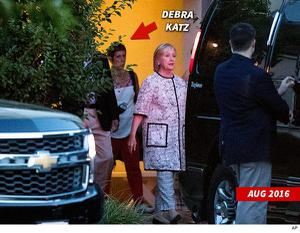
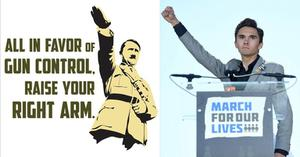
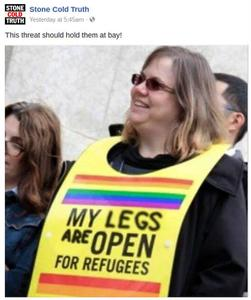
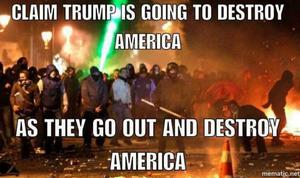
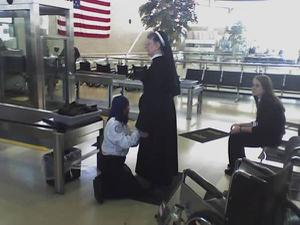
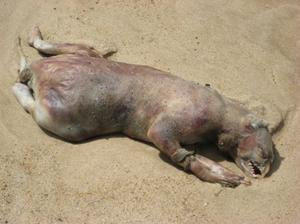
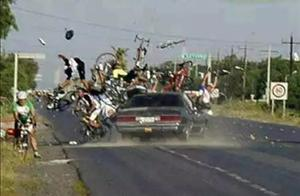
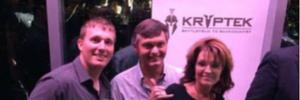
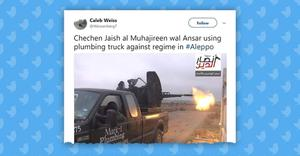
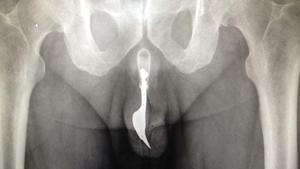

In [151]:
HTML(df[(df.false_perc!=0) & (df.true_perc!=0) & (df.mixed_perc!=0)][['claim','image']].to_html(formatters={'image': image_formatter}, escape=False))

In [50]:
true_captions = list(df[df.label=='true'].iloc[:21].url_caption)

In [58]:
for c in true_captions:
    source = '../../data/raw/images/{}'.format(c)
    dest = '../../data/external/ela/real/'
    ! cp {source} {dest} 

In [26]:
row='asd=https://scontent.fsof6-1.fna.fbcdn.net/v/t1.0-0/p480x480/47576062_10218342005561072_1126459639865540608_n.jpg?_nc_cat=108&_nc_ht=scontent.fsof6-1.fna&oh=1f29a0011c8ab2a238b34988af8aaa8b&oe=5C9025BA'

In [53]:
row.strip().split('=')[0], '='.join(row.strip().split('=')[1:])

('asd',
 'https://scontent.fsof6-1.fna.fbcdn.net/v/t1.0-0/p480x480/47576062_10218342005561072_1126459639865540608_n.jpg?_nc_cat=108&_nc_ht=scontent.fsof6-1.fna&oh=1f29a0011c8ab2a238b34988af8aaa8b&oe=5C9025BA')